### Q1

In spectral graph theory, eigenvectors of a large graph can be used to partition the graph. The
basic clustering is usually done using the second eigenvector. For the following test, we want to
compare the performance of applying Eigen-vector based clustering and traditional well-known
k-mean clustering.
For a graph data borrowed from the following website, do the steps of (a)-(d).
Website of data: https://snap.stanford.edu/data/index.html.


### Downsampling

First down-sample the graph of your choice from the website to have an undirected graph of
1000 node. Then, answer the following questions.

In [1]:
# ! pip install networkx
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering,KMeans
import matplotlib.pyplot as plt

# Read the CSV file as a pandas dataframe
df = pd.read_csv('large_twitch_edges.csv')

df.head()

,numeric_id_1,numeric_id_2
0,98343,141493
1,98343,58736
2,98343,140703
3,98343,151401
4,98343,157118


We are going to crawl over the data and create nodes from each row of the dataframe. We keep track of the number of nodes in the graph. When it reaches 1000 node count we stop adding edges to the network.

In [2]:
# Create an empty graph
G = nx.Graph()

# Add edges to the graph from the dataframe
for index, row in df.iterrows():
    G.add_edge(row['numeric_id_1'], row['numeric_id_2'])
    if G.number_of_nodes() == 1000:break   # If node count is 1000 : break


# count of node
print(G.number_of_nodes())


1000


Converting Graph data to numpy array (adjacency matrix) for simplicity

In [3]:
A = nx.to_numpy_array(G)


### (a)

Spectral Clustering: Partition the graph using Spectral clustering for K=2

In [4]:
sc = SpectralClustering(2, affinity='precomputed', n_init=100)
sc.fit(A)

SpectralClustering(affinity='precomputed', n_clusters=2, n_init=100)

### (b)

KMeans Clustering: Partition the graph using K-mean clustering for K=2

In [5]:
km = KMeans(n_clusters=2, n_init=100)
km.fit(A)

KMeans(n_clusters=2, n_init=100)

### (c)

Color each partition with a different color

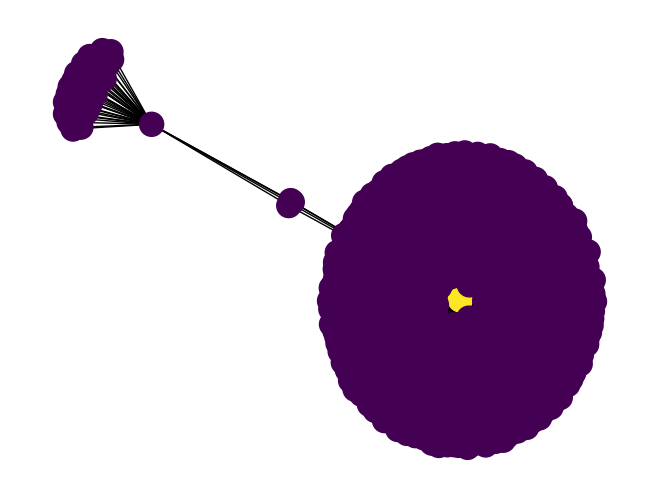

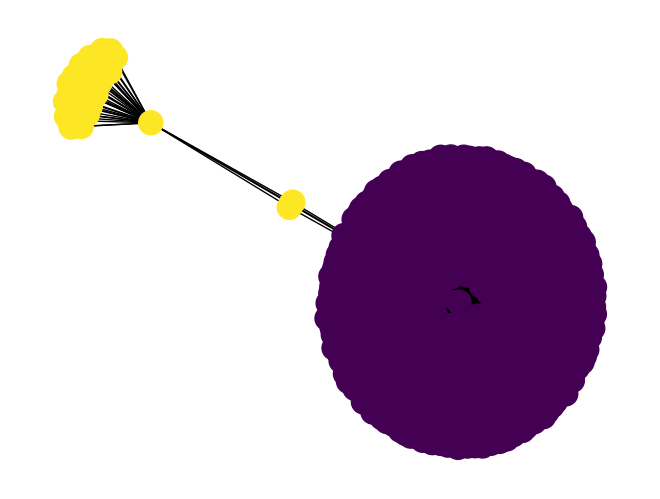

In [6]:

plt.figure(1)
nx.draw(G, pos=nx.drawing.layout.spring_layout(G), 
           with_labels=False, node_color=km.labels_)
plt.figure(2)
nx.draw(G, pos=nx.drawing.layout.spring_layout(G), 
           with_labels=False, node_color=sc.labels_)
plt.show()

### (d)

Repeat (a)-(c) for the case of partitioning into 4 groups. 

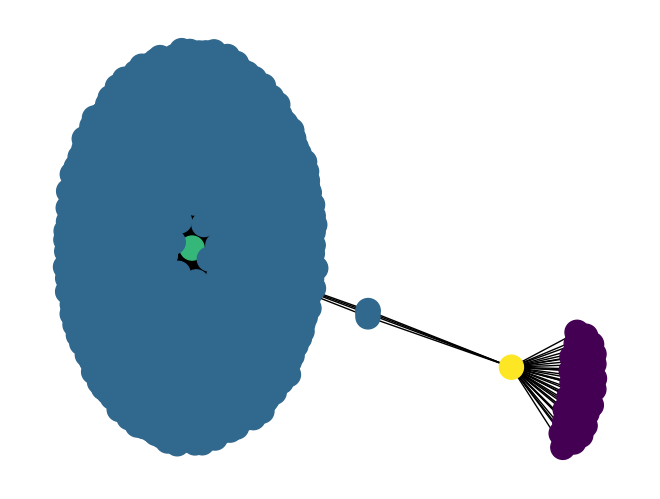

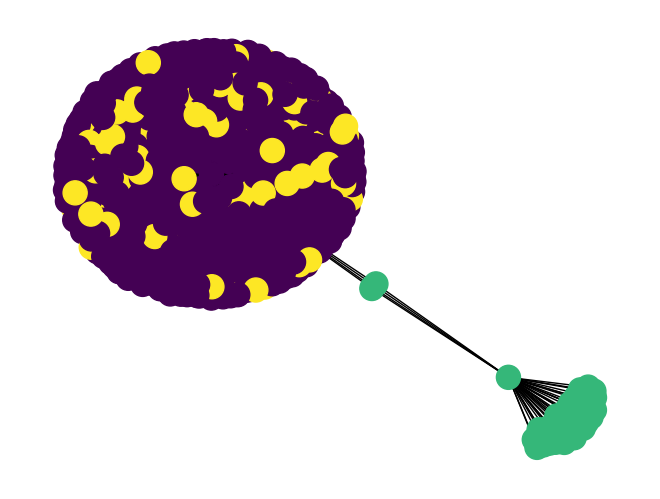

In [7]:
#a with cluster = 4
sc4 = SpectralClustering(n_clustersint=4, n_init=100)
sc4.fit(A)
#a with cluster = 4
km4 = KMeans(n_clustersint=4, n_init=100)
km4.fit(A)

plt.figure(1)
nx.draw(G, pos=nx.drawing.layout.spring_layout(G), 
           with_labels=False, node_color=km4.labels_)
plt.figure(2)
nx.draw(G, pos=nx.drawing.layout.spring_layout(G), 
           with_labels=False, node_color=sc4.labels_)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=192f5afd-c85f-40e6-b96a-a9e45f0b4814' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>